# Data acquisition

Hello! users.Welcome to my AI model.I'm using my model to predict the types of wheat seeds using the physical attributes of a wheat seed.The seed type is essential to determine what type of wheat farmers desire to grow.

So the different physical attributes I will be using are as follows:
1.area
2.perimeter	
3.lengthOfKernel
4.widthOfKernel
5.lengthOfKernelGroove

<img src = "F1.png">

Q)What is a kernel:

A)A wheat berry, or wheatberry, is a whole wheat kernel, composed of the bran, germ, and endosperm, without the husk. Botanically, it is a type of fruit called a caryopsis. Wheat berries have a tan to reddish-brown color and are available as either a hard or soft processed grain. They are often added to salads or baked into bread to add a crunchy texture. If wheat berries are milled, whole-wheat flour is produced.

So as per research "Kernel size and hardness are important for millers and they should be controlled prior to milling. The kernel hardness also determines end-use quality of wheat. The objective of this study was to determine the effect of kernel size on wheat kernel characteristics, especially kernel hardness, milling yield and various flour quality properties. Three bread wheat varieties (Bayraktar 2000, Demir 2000 and Ikizce 96) were used after separating them into three kernel size groups. As expected, 1000 kernel weight significantly (P<0.05) decreased with decreasing kernel size. Results of three hardness tests (single kernel characterisation system, pearling index and particle size index) were parallel and hardness of the samples significantly increased (P<0.05) as the kernel size decreased. Flour yields were generally lower in the smaller kernels. However, the decrease in flour yield was not significant for cv Bayraktar 2000. In two cultivars protein content and wet gluten had a significant (P<0.05) decreasing tendency with decreasing kernel size while those of the third cultivar were not affected by kernel size. Sedimentation values of the samples were not affected by kernel size. Overall, small kernels did not seem to influence flour quality while they generally had a detrimental effect on milling yield." from the websitehttps://www.wageningenacademic.com/

<img src = "Images-of-wheat-kernel-surface-and-cross-section-with-a-indication-of-the-dimensions.png
">

So we can observe that when kernel size is larger the amount of flour is more.

The three types of wheat seeds are:
1.Common wheat
2.Khorasan
3.Emmer

In [1]:
#importing all the modules and libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import urllib.request
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix  
import seaborn as sns

# Data Exploration

In [2]:
#saving the csv file into a variable which we will call data
data=pd.read_csv("seeds_dataset.csv")
print(data.head())
print(data.info())
data.describe()

   ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove      seedType  
0                 2.221                 5.220  Common_wheat  
1                 1.018                 4.956  Common_wheat  
2                 2.699                 4.825  Common_wheat  
3                 2.259                 4.805  Common_wheat  
4                 1.355                 5.175  Common_wheat  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  ---

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [3]:
#now drop the unnecessary columns using drop()function and save it as a new data file df which we will use in the whole model
df=data.drop(["asymmetryCoefficient"],axis=1)
df=df.drop(["compactness"],axis=1)
df.head()

,ID,area,perimeter,lengthOfKernel,widthOfKernel,lengthOfKernelGroove,seedType
0,1,15.26,14.84,5.763,3.312,5.220,Common_wheat
1,2,14.88,14.57,5.554,3.333,4.956,Common_wheat
2,3,14.29,14.09,5.291,3.337,4.825,Common_wheat
3,4,13.84,13.94,5.324,3.379,4.805,Common_wheat
4,5,16.14,14.99,5.658,3.562,5.175,Common_wheat


Now we check for a relationship between these attributes

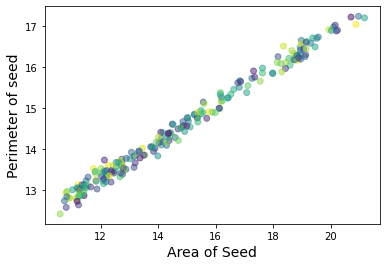

In [4]:
x = df.area
y = df.perimeter
colors = np.random.rand(len(y))
plt.xlabel ("Area of Seed", fontsize = 14)
plt.ylabel ("Perimeter of seed", fontsize = 14)
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

Here there is a linear relationship between area and perimeter of wheat seed

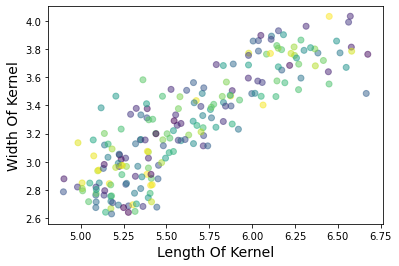

In [5]:
x = df.lengthOfKernel
y = df.widthOfKernel
colors = np.random.rand(len(y))
plt.xlabel ("Length Of Kernel", fontsize = 14)
plt.ylabel ("Width Of Kernel", fontsize = 14)
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

Here it is a bit scattered but still shows linear relationship

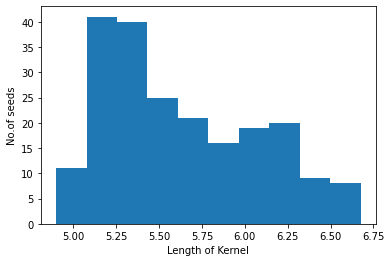

In [6]:
#Now we use histogram to see length of Kernel variation
y = df.lengthOfKernel

plt.hist(y,bins=10)

plt.ylabel("No.of seeds")
plt.xlabel("Length of Kernel")

plt.show()

So most of the seeds have maximum no. of seeds with kernel length 5 to 5.25

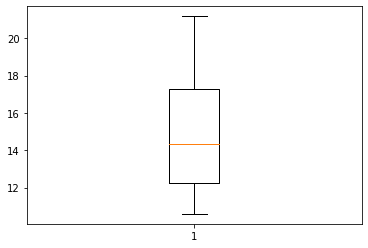

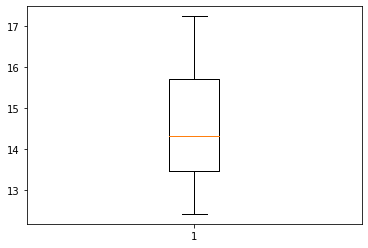

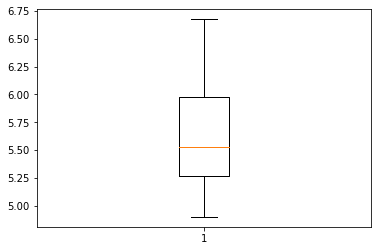

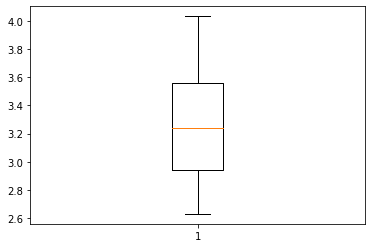

In [7]:
y=df.area

plt.boxplot(y,showfliers=True)
plt.show()
y=df.perimeter

plt.boxplot(y,showfliers=True)
plt.show()
y=df.lengthOfKernel

plt.boxplot(y,showfliers=True)
plt.show()
y=df.widthOfKernel

plt.boxplot(y,showfliers=True)
plt.show()

we see that there are no outliers

In [8]:
df_Common_wheat = df[df['seedType'] == 'Common_wheat']
df_Khorasan = df[df['seedType'] == 'Khorasan']
df_Emmer = df[df['seedType'] == 'Emmer']

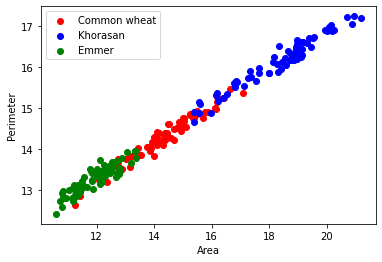

In [9]:
plt.scatter(df_Common_wheat['area'],df_Common_wheat['perimeter'],c='r',label='Common wheat')
plt.scatter(df_Khorasan['area'],df_Khorasan['perimeter'],c='b',label='Khorasan')
plt.scatter(df_Emmer['area'],df_Emmer['perimeter'],c='g',label='Emmer')

plt.legend()
plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.show()

here we see that common wheat is showing some similarties with emmer but isnt same


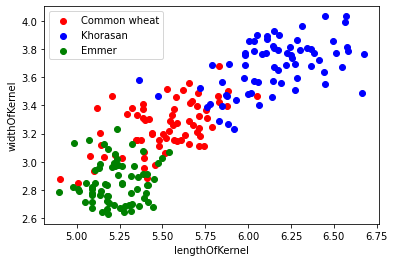

In [10]:
plt.scatter(df_Common_wheat['lengthOfKernel'],df_Common_wheat['widthOfKernel'],c='r',label='Common wheat')
plt.scatter(df_Khorasan['lengthOfKernel'],df_Khorasan['widthOfKernel'],c='b',label='Khorasan')
plt.scatter(df_Emmer['lengthOfKernel'],df_Emmer['widthOfKernel'],c='g',label='Emmer')

plt.legend()
plt.xlabel('lengthOfKernel')
plt.ylabel('widthOfKernel')

plt.show()

here we see that the types are mixed up a bit on basis of the kernal

Now checking if there are any missing data


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   lengthOfKernelGroove  210 non-null    float64
 6   seedType              210 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 11.6+ KB


here we see that there are no missing data values and erroneous data

Now we have reached the stage where we create the model.

In [12]:
print(df['seedType'].value_counts())
label_encode = {"seedType": {"Common_wheat":0, "Khorasan":1, "Emmer":2}}
df.replace(label_encode,inplace=True)
print(df['seedType'].value_counts())
y_values = df['seedType']
print(y_values)


Common_wheat    70
Khorasan        70
Emmer           70
Name: seedType, dtype: int64
2    70
1    70
0    70
Name: seedType, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: seedType, Length: 210, dtype: int64


In [13]:
#The standardscaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1
x_values =df[['area','perimeter','lengthOfKernel','widthOfKernel','lengthOfKernelGroove']]
standardise = StandardScaler()
x_values = standardise.fit_transform(x_values)
x_values_df = pd.DataFrame(x_values)
y_values = df['seedType']
y_values = to_categorical(y_values)
print(y_values)
print(x_values_df.head())
print(x_values_df.describe())


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Here we see that mean is tending to 0 and standard deviation is tending to 1

Now we make the artificial neural network

# Modeling

In [14]:
model = Sequential()
model.add(Dense(6,input_dim=5,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax')) 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Now we check the model accucracy by putting different values of
model.fit(x_values,y_values,epochs=70,shuffle=True)

Epoch 1/70
7/7 [==============================] - 1s 1ms/step - loss: 1.2284 - accuracy: 0.3096
Epoch 2/70
7/7 [==============================] - 0s 1ms/step - loss: 1.1736 - accuracy: 0.3017
Epoch 3/70
7/7 [==============================] - 0s 1ms/step - loss: 1.1506 - accuracy: 0.3158
Epoch 4/70
7/7 [==============================] - 0s 1ms/step - loss: 1.1604 - accuracy: 0.2822
Epoch 5/70
7/7 [==============================] - 0s 2ms/step - loss: 1.1025 - accuracy: 0.3023
Epoch 6/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0955 - accuracy: 0.2970
Epoch 7/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0814 - accuracy: 0.3003
Epoch 8/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.2844
Epoch 9/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0617 - accuracy: 0.3006
Epoch 10/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.3384
Epoch 11/70
7/7 [======================

Now we create a test dataset and train dataset

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.20,random_state=40)
print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])
standardise = StandardScaler()
x_train = standardise.fit_transform(x_train)
x_test = standardise.transform(x_test)


Number of rows in x_train: 168
Number of rows in x_test: 42
Number of rows in y_train: 168
Number of rows in y_test: 42


In [17]:
model_val = Sequential()
model_val.add(Dense(6,input_dim=5,activation='relu')) 
model_val.add(Dense(6,activation='relu'))
model_val.add(Dense(6,activation='relu'))
model_val.add(Dense(3,activation='softmax'))
model_val.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_val.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


# Evaluation

In [18]:
model_val.fit(x_train,y_train,epochs=60,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/60
6/6 [==============================] - 2s 299ms/step - loss: 1.0625 - accuracy: 0.4519 - val_loss: 1.0657 - val_accuracy: 0.3810
Epoch 2/60
6/6 [==============================] - 0s 12ms/step - loss: 1.0364 - accuracy: 0.5167 - val_loss: 1.0496 - val_accuracy: 0.4048
Epoch 3/60
6/6 [==============================] - 0s 12ms/step - loss: 1.0280 - accuracy: 0.4651 - val_loss: 1.0333 - val_accuracy: 0.4048
Epoch 4/60
6/6 [==============================] - 0s 12ms/step - loss: 1.0029 - accuracy: 0.5111 - val_loss: 1.0173 - val_accuracy: 0.4286
Epoch 5/60
6/6 [==============================] - 0s 12ms/step - loss: 0.9833 - accuracy: 0.5288 - val_loss: 1.0011 - val_accuracy: 0.4286
Epoch 6/60
6/6 [==============================] - 0s 13ms/step - loss: 0.9763 - accuracy: 0.5397 - val_loss: 0.9846 - val_accuracy: 0.4286
Epoch 7/60
6/6 [==============================] - 0s 12ms/step - loss: 0.9649 - accuracy: 0.5357 - val_loss: 0.9670 - val_accuracy: 0.4762
Epoch 8/60
6/6 [==========

6/6 [==============================] - 0s 13ms/step - loss: 0.2792 - accuracy: 0.9188 - val_loss: 0.3190 - val_accuracy: 0.9048
Epoch 60/60
6/6 [==============================] - 0s 18ms/step - loss: 0.2933 - accuracy: 0.9012 - val_loss: 0.3128 - val_accuracy: 0.9286


In [19]:
test=x_test.copy()
y_predict=model_val.predict(test)
y_predict

array([[2.85707116e-01, 6.52399838e-01, 6.18930571e-02],
       [1.55801237e-01, 2.63338513e-03, 8.41565311e-01],
       [4.47421640e-01, 4.39192176e-01, 1.13386147e-01],
       [1.90974310e-01, 4.08039801e-03, 8.04945290e-01],
       [8.69641751e-02, 3.90934991e-04, 9.12644863e-01],
       [3.33815485e-01, 2.59017106e-03, 6.63594306e-01],
       [9.41110682e-03, 9.90422845e-01, 1.66131489e-04],
       [8.81433427e-01, 1.15572261e-02, 1.07009396e-01],
       [8.46382827e-02, 3.57494951e-04, 9.15004253e-01],
       [1.35423662e-02, 9.86107111e-01, 3.50536080e-04],
       [2.66254563e-02, 9.72462356e-01, 9.12239600e-04],
       [1.07990623e-01, 8.05819698e-04, 8.91203582e-01],
       [2.19387427e-01, 4.30036383e-03, 7.76312232e-01],
       [1.30346984e-01, 1.52823760e-03, 8.68124783e-01],
       [1.62670165e-01, 2.35678838e-03, 8.34972978e-01],
       [2.75570061e-02, 9.71379042e-01, 1.06393360e-03],
       [6.78292572e-01, 2.94196443e-03, 3.18765402e-01],
       [3.72815430e-02, 9.60898

In [20]:
print(confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))) 

[[11  1  1]
 [ 1 12  0]
 [ 0  0 16]]


In [21]:
y_predict=np.round(y_predict,decimals=0)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

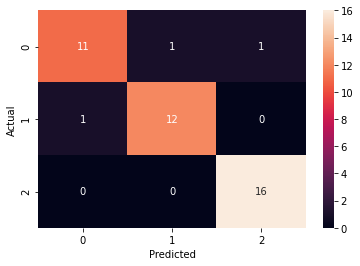

In [22]:
df = pd.DataFrame()
df['Actual'] =y_test.argmax(axis=1)
df['Predicted'] = y_predict.argmax(axis=1)
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d")

# Deployment

In [23]:
test2=pd.DataFrame()
test2['area']=[float(input("Area   :"))]
test2['perimeter']=[float(input("perimeter   :"))]
test2['lengthOfKernel']=[float(input("lengthOfKernel   :"))]
test2['widthOfKernel']=[float(input("widthOfKernel   :"))]
test2['lengthOfKernelGroove']=[float(input("lengthOfKernelGroove   :"))]
predict_seed=model.predict(test2)
a=predict_seed.argmax(axis=1)
if a==0:
    print("The type of wheat seed to be used is Common Wheat")
elif a==1:
    print("The type of wheat seed to be used is Khorasan")
elif a==2:
    print("The type of wheat seed to be used is Emmer")
    

Area   :15
perimeter   :15
lengthOfKernel   :5
widthOfKernel   :5
lengthOfKernelGroove   :3
The type of wheat seed to be used is Common Wheat
